# Análisis de Datos (previo al modelo lineal)


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("spotify-2023.csv")

print("== Dimensiones ==")
print(df.shape)

print("\n== Tipos de datos ==")
print(df.dtypes)

print("\n== Vista previa ==")
df.head(10)

TARGET = "streams"

== Dimensiones ==
(952, 11)

== Tipos de datos ==
track_name            object
artist(s)_name        object
released_year          int64
streams                int64
danceability_%         int64
valence_%              int64
energy_%               int64
acousticness_%         int64
instrumentalness_%     int64
liveness_%             int64
speechiness_%          int64
dtype: object

== Vista previa ==


In [3]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols[:10]

['released_year',
 'streams',
 'danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%']

In [5]:
na = df.isna().sum().sort_values(ascending=False)
na = na[na > 0]
na.to_frame("na_count") if not na.empty else print("No hay valores perdidos.")

,na_count
track_name,2


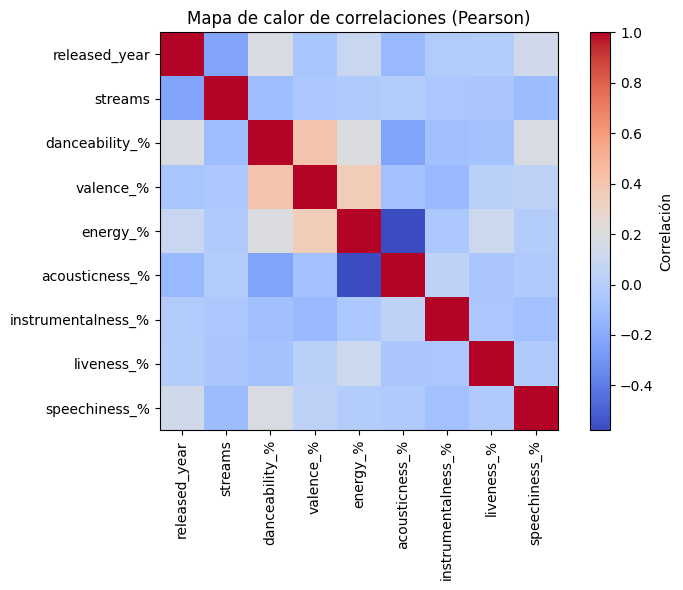

In [16]:
if len(numeric_cols) >= 2:
    corr = df[numeric_cols].corr(method="pearson")
    corr.round(3)
else:
    print("No hay suficientes variables numéricas para correlaciones.")

plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.title("Mapa de calor de correlaciones (Pearson)")
plt.colorbar(label="Correlación")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()


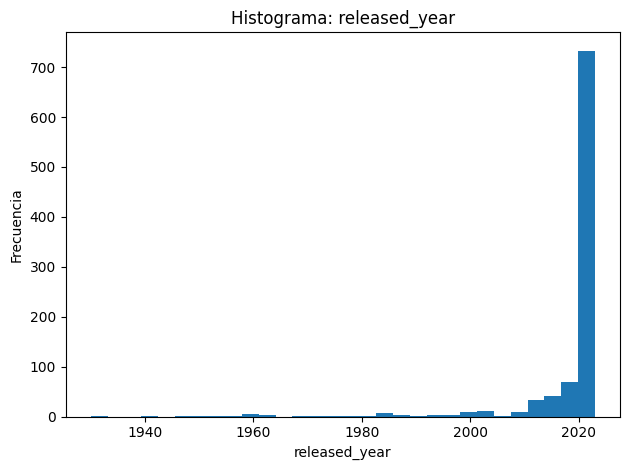

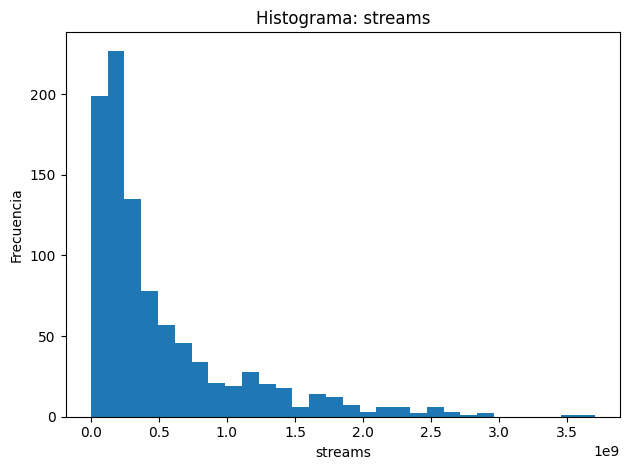

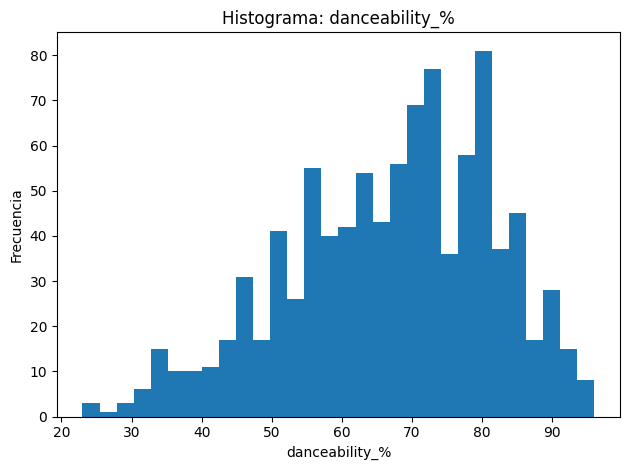

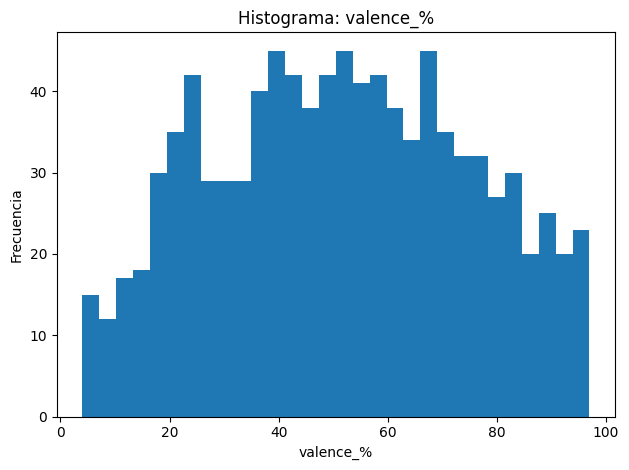

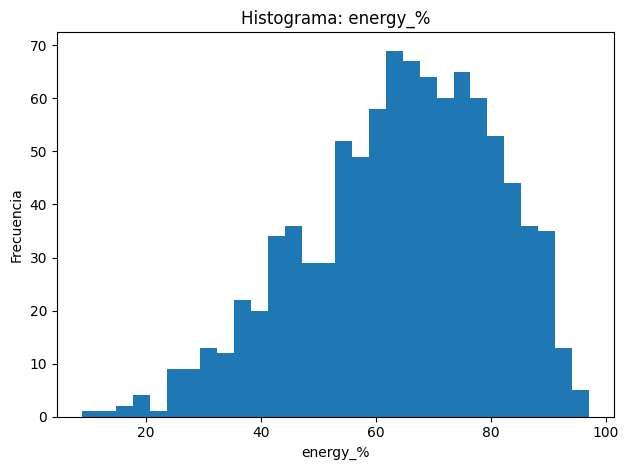

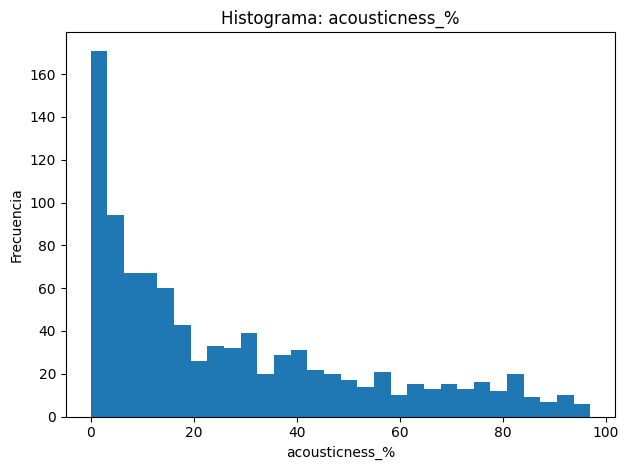

In [8]:
for col in numeric_cols[:6]:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Histograma: {col}")
    plt.xlabel(col); plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

/var/folders/wq/_j4r06q515g1xzljyw7wfs800000gn/T/ipykernel_27843/1282227805.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, vert=True, labels=numeric_cols[:8], showfliers=True)


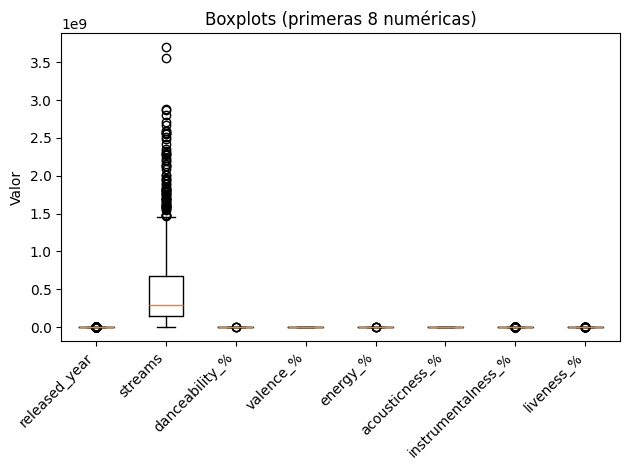

In [15]:
if len(numeric_cols) >= 1:
    plt.figure()
    data = [df[c].dropna().values for c in numeric_cols[:8]]
    plt.boxplot(data, vert=True, labels=numeric_cols[:8], showfliers=True)
    plt.title("Boxplots (primeras 8 numéricas)")
    plt.ylabel("Valor")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("Sin numéricas para boxplot.")

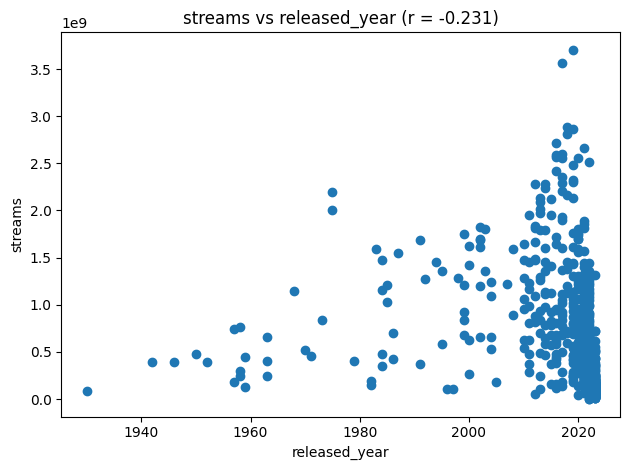

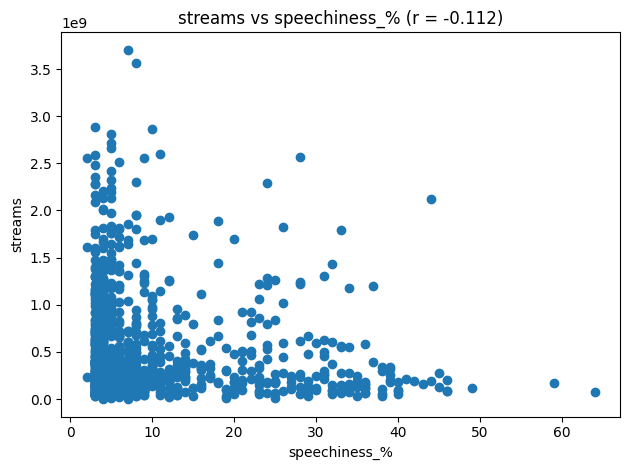

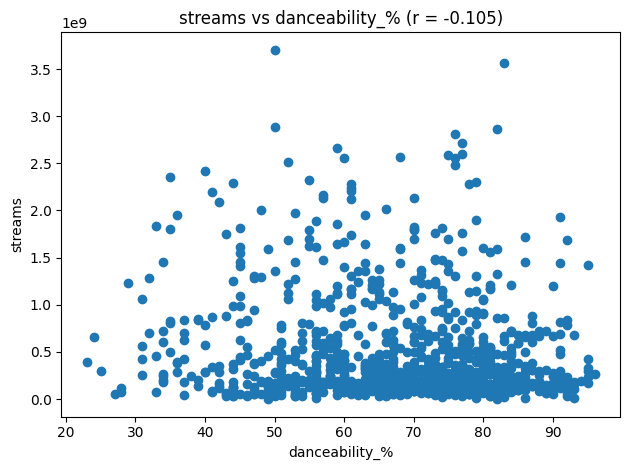

In [13]:
if TARGET in df.columns and pd.api.types.is_numeric_dtype(df[TARGET]) and len(numeric_cols) >= 2:
    abs_corrs = df[numeric_cols].corr(method="pearson")[TARGET].drop(labels=[TARGET]).abs().sort_values(ascending=False)
    for x in list(abs_corrs.index[:3]):
        r = df[[x, TARGET]].corr(method="pearson").iloc[0, 1]
        plt.figure()
        plt.scatter(df[x], df[TARGET])
        plt.title(f"{TARGET} vs {x} (r = {r:.3f})")
        plt.xlabel(x); plt.ylabel(TARGET)
        plt.tight_layout()
        plt.show()
else:
    print("No se pudo trazar dispersión Y vs X (revisa TARGET o tipos numéricos).")